In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
def visualize_data(images, categories, class_names):
    fig = plt.figure(figsize=(14, 6))
    fig.patch.set_facecolor('white')
    for i in range(3 * 7):
        plt.subplot(3, 7, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i])
        class_index = categories[i].argmax()
        plt.xlabel(class_names[class_index])
    plt.show()

170500096/170498071 [==============================] - 4s 0us/step


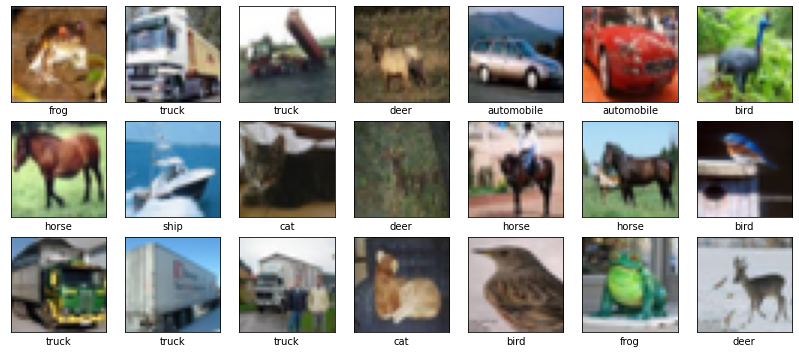

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
y_train = to_categorical(y_train, num_classes)

x_test = x_test / 255.0
y_test = to_categorical(y_test, num_classes)

visualize_data(x_train, y_train, class_names)

In [ ]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same',))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same',))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same',))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same',))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
batch_size = 32
epochs = 10
m_no_aug = create_model()
m_no_aug.summary()

history_no_aug = m_no_aug.fit(
    x_train, y_train,
    epochs=epochs, batch_size=batch_size,
    validation_data=(x_test, y_test))

loss_no_aug, acc_no_aug = m_no_aug.evaluate(x_test,  y_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         7

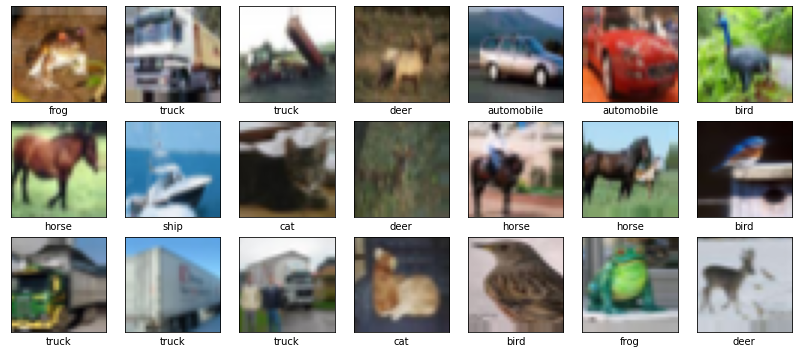

In [ ]:
width_shift = 3/32
height_shift = 3/32
flip = True

datagen = ImageDataGenerator(
    horizontal_flip=flip,
    width_shift_range=width_shift,
    height_shift_range=height_shift,
    )
datagen.fit(x_train)

it = datagen.flow(x_train, y_train, shuffle=False)
batch_images, batch_labels = next(it)
visualize_data(batch_images, batch_labels, class_names)

In [ ]:
m_aug = create_model()
datagen.fit(x_train)

history_aug = m_aug.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test))
loss_aug, acc_aug = m_aug.evaluate(x_test,  y_test)

Epoch 1/10
1563/1563 [==============================] - 346s 221ms/step - loss: 1.5422 - accuracy: 0.4315 - val_loss: 1.2346 - val_accuracy: 0.5610
Epoch 2/10
1563/1563 [==============================] - 342s 219ms/step - loss: 1.1044 - accuracy: 0.6066 - val_loss: 0.9454 - val_accuracy: 0.6747
Epoch 3/10
1563/1563 [==============================] - 344s 220ms/step - loss: 0.9313 - accuracy: 0.6702 - val_loss: 0.9012 - val_accuracy: 0.6928
Epoch 4/10
1563/1563 [==============================] - 341s 218ms/step - loss: 0.8187 - accuracy: 0.7132 - val_loss: 0.7680 - val_accuracy: 0.7378
Epoch 5/10
1563/1563 [==============================] - 342s 219ms/step - loss: 0.7528 - accuracy: 0.7368 - val_loss: 0.7465 - val_accuracy: 0.7447
Epoch 6/10
1563/1563 [==============================] - 340s 217ms/step - loss: 0.7045 - accuracy: 0.7541 - val_loss: 0.6975 - val_accuracy: 0.7645
Epoch 7/10
1563/1563 [==============================] - 341s 218ms/step - loss: 0.6702 - accuracy: 0.7659 - val_

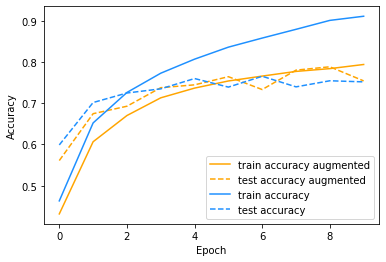

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(history_aug.history['accuracy'],
         label='train accuracy augmented',
         c='orange', ls='-')
plt.plot(history_aug.history['val_accuracy'],
         label='test accuracy augmented',
         c='orange',ls='--')

plt.plot(history_no_aug.history['accuracy'],
         label='train accuracy',
         c='dodgerblue', ls='-')
plt.plot(history_no_aug.history['val_accuracy'],
         label='test accuracy',
         c='dodgerblue', ls='--')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#@title upload Augmented Predict Class { run: "auto", display-mode: "both" }

from google.colab import files
upload = files.upload()
print("airplane")
